# Linear regression

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [2]:
data = pd.read_csv("Salary_data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

Text(0, 0.5, 'Salary')

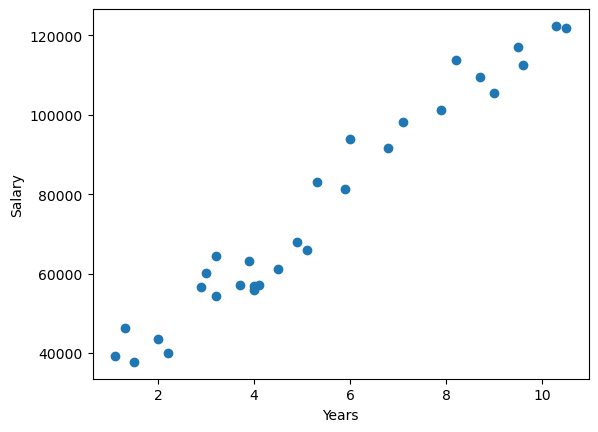

In [6]:
plt.scatter(data.YearsExperience, data.Salary)
plt.xlabel("Years")
plt.ylabel("Salary")

## Train test split

In [17]:
X = data.iloc[:, 0:1]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [18]:
y = data.iloc[:, 1:]

In [19]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#Splitting the dataset into train and test


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


## Model building

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## Train the model

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

## Test the model

In [24]:
y_pred=lr.predict(X_test)

In [25]:
y_pred #prediction

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [26]:
y_test # Actual outcome

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


## Error

In [27]:
E=y_test-y_pred
E

,Salary
2,-3017.961841
28,-308.622956
13,-7880.657170
10,118.857855
26,1719.437145
24,1631.497247


## R2 score

In [28]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.9864826731176541

## Predict random valuea

In [29]:
#Predict with random Values
y_pr=lr.predict([[12]])
y_pr

/Users/akashr/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[138531.00067138]])

## Plotting regression line

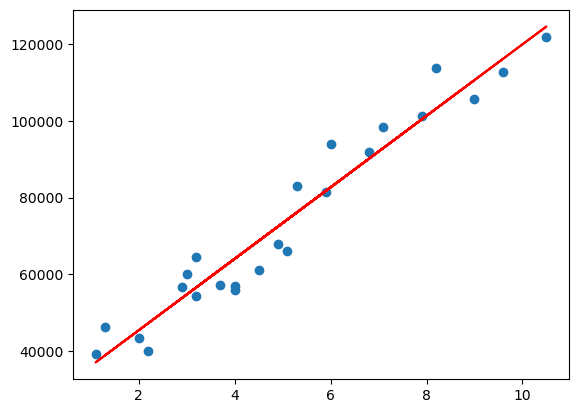

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),'r')

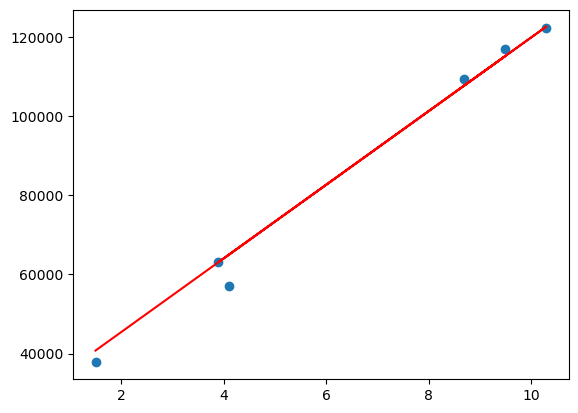

In [32]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

# Multilinear Regression

## Import necessary libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [34]:
data = pd.read_csv("50_Startups.csv")

In [35]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [37]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [38]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [39]:
data.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [40]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
data.State = le.fit_transform(data.State)

In [45]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    int64  
 4   Profit           108 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.3 KB


## Dependent and Independent variables

In [52]:
y = data.loc[:, "Profit":]
X = data.drop(columns=["Profit"], axis=1)

In [53]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
...,...
103,132602.65
104,129917.04
105,126992.93
106,125370.37


In [54]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
...,...,...,...,...
103,119943.24,156547.42,256512.92,1
104,114523.61,122616.84,261776.23,2
105,78013.11,121597.55,264346.06,0
106,94657.16,145077.58,282574.31,2


## Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [55]:
columns = X.columns

In [57]:
X = scale.fit_transform(X)
X

array([[ 2.01819092,  0.55696553,  2.18783528,  1.16731536],
       [ 1.95675646,  1.0893969 ,  1.95029024, -1.23401909],
       [ 1.75232048, -0.75766814,  1.64392865, -0.03335187],
       [ 1.54982902, -0.1132146 ,  1.43322263,  1.16731536],
       [ 1.49925539, -1.11632102,  1.28814125, -0.03335187],
       [ 1.27083396, -0.806604  ,  1.25996984,  1.16731536],
       [ 1.3319795 ,  0.93574262, -0.74312422, -1.23401909],
       [ 1.23558377,  0.87437939,  0.92787631, -0.03335187],
       [ 1.01776417,  0.99163696,  0.82340982,  1.16731536],
       [ 1.08011094, -0.48065199,  0.76691751, -1.23401909],
       [ 0.60181303, -0.4102384 ,  0.1210342 , -0.03335187],
       [ 0.57410176, -1.10165542,  0.29637694, -1.23401909],
       [ 0.4220906 ,  0.20479752,  0.29718526, -0.03335187],
       [ 0.38030758,  0.50538623,  0.32125438, -1.23401909],
       [ 1.00438367,  1.27949493,  0.35403374, -0.03335187],
       [ 0.88337621,  0.03184527,  0.39886959,  1.16731536],
       [ 0.06818346, -0.

In [58]:
X= pd.DataFrame(X, columns=columns)
X

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352
...,...,...,...,...
103,1.004384,1.279495,0.354034,-0.033352
104,0.883376,0.031845,0.398870,1.167315
105,0.068183,-0.005635,0.420761,-1.234019
106,0.439806,0.857741,0.576039,1.167315


## Train test split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#Splitting the dataset into train and test


In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(86, 4)
(22, 4)
(86, 1)
(22, 1)


## Model building

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## Train the model

In [62]:
lr.fit(X_train,y_train)

LinearRegression()

## Test the model

In [63]:
y_pred=lr.predict(X_test)

In [64]:
y_pred #prediction

array([[ 48379.24868386],
       [134848.9192467 ],
       [ 76483.10965225],
       [181561.78529188],
       [112966.00035112],
       [134241.68257226],
       [129222.38731942],
       [160017.05919784],
       [116752.96050775],
       [ 46260.9926407 ],
       [102266.36060189],
       [115568.27177598],
       [ 48379.24868386],
       [119114.16525526],
       [ 88602.22002789],
       [127101.40273623],
       [127101.40273623],
       [ 90942.33421515],
       [ 58677.7334991 ],
       [146304.26215166],
       [149410.05441   ],
       [152502.87810448]])

In [65]:
y_test # Actual outcome

,Profit
84,64926.08
10,146121.95
75,90708.19
2,191050.39
24,108552.04
100,144259.40
107,124266.90
7,155752.60
16,126992.93
86,42559.73


## Error

In [66]:
E=y_test-y_pred
E

,Profit
84,16546.831316
10,11273.030753
75,14225.080348
2,9488.604708
24,-4413.960351
100,10017.717428
107,-4955.487319
7,-4264.459198
16,10239.969492
86,-3701.262641


# Polynomial regression

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [68]:
data = pd.read_csv("Position_Salaries.csv")

In [69]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [71]:
data.isnull().any()

Position    False
Level       False
Salary      False
dtype: bool

Text(0, 0.5, 'Salary')

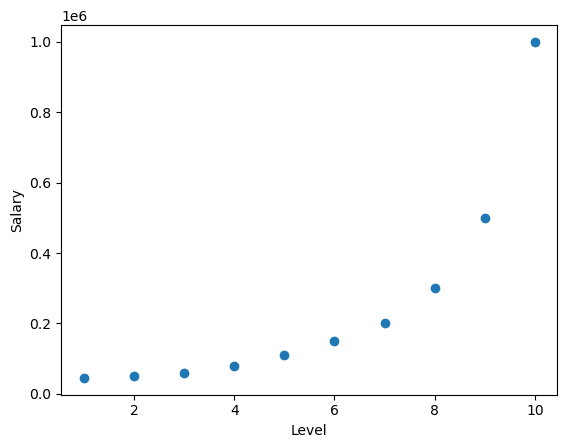

In [73]:
plt.scatter(data.Level, data.Salary)
plt.xlabel("Level")
plt.ylabel("Salary")

## Train test split

In [74]:
X = data.iloc[:, 1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [75]:
y = data.iloc[:, 2:3]

In [76]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#Splitting the dataset into train and test


In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 1)
(2, 1)
(8, 1)
(2, 1)


## Model building

In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## Train the model

In [80]:
lr.fit(X_train,y_train)

LinearRegression()

## Test the model

In [81]:
y_pred=lr.predict(X_test)

In [82]:
y_pred #prediction

array([[ 44275.9295499 ],
       [543473.58121331]])

In [83]:
y_test # Actual outcome

,Salary
2,60000
8,500000


## Error

In [84]:
E=y_test-y_pred
E

,Salary
2,15724.070450
8,-43473.581213


## R2 score

In [85]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.982847405505933

## Predict random valuea

In [86]:
#Predict with random Values
y_pr=lr.predict([[12]])
y_pr

/Users/akashr/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[793072.40704501]])

## Plotting regression line

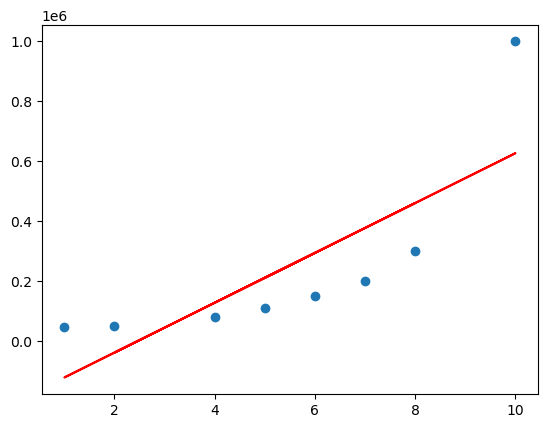

In [87]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),'r')

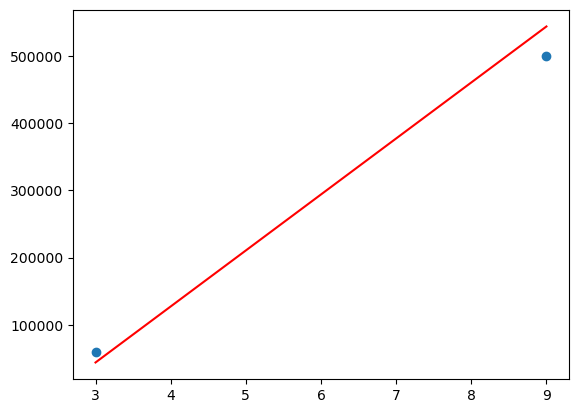

In [88]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')

## R2 score

In [89]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.982847405505933

## Adding Polynomial feautures

In [90]:
#convert the normal values to polynomial features
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)
#x0,x1,x2,x3,x4
X_poly=pr.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [91]:
#associating above values with y
pr.fit(X_poly,y)

PolynomialFeatures(degree=4)

In [93]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_poly,y)

pred=lr.predict(X_poly)

In [94]:
pred

array([[ 53356.6433568 ],
       [ 31759.90675996],
       [ 58642.19114221],
       [ 94632.86713289],
       [121724.94172497],
       [143275.05827508],
       [184003.49650349],
       [289994.17249411],
       [528694.63869453],
       [988916.08391595]])

In [95]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


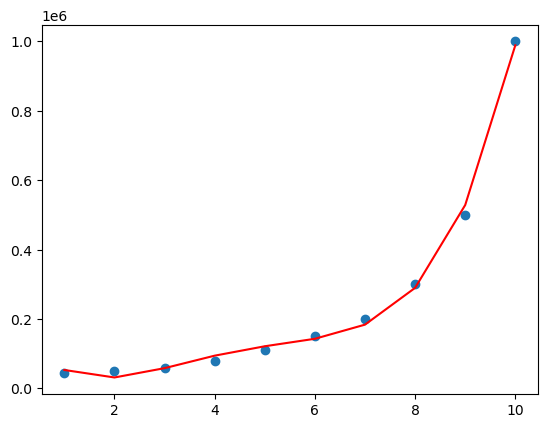

In [96]:
plt.scatter(X,y)
plt.plot(X,pred,'r')